In [1]:
%reset
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### box plots and scatter plots of TF activities for the top TT and TCP in A375

In [2]:
def TFA_boxplot_of_TT(cell, TTS_pos_top2, label_color, ax):
    TF1, TF2= list(TTS_pos_top2.index)

    TFA_df=pd.read_table('result/TF_activity_viper/TFA_{}_v.txt'.format(cell), sep='\t')
    TF1_neg_TFA=TFA_df.loc[TFA_df['effect']==0, TF1]
    TF1_pos_TFA=TFA_df.loc[TFA_df['effect']==1, TF1]
    TF2_neg_TFA=TFA_df.loc[TFA_df['effect']==0, TF2]
    TF2_pos_TFA=TFA_df.loc[TFA_df['effect']==1, TF2]
    
    flierprops = dict(marker='o', markersize=4,markerfacecolor='none',markeredgecolor='grey')
    
    bp1=ax.boxplot([TF1_neg_TFA, TF2_neg_TFA], positions=[1,3], widths=0.5 ,patch_artist=True,
                   boxprops={'facecolor':'lightskyblue'}, flierprops=flierprops, whiskerprops=dict(color='grey'), medianprops=dict(color='grey'), capprops=dict(color='grey'))
    bp2=ax.boxplot([TF1_pos_TFA, TF2_pos_TFA], positions=[1.5,3.5], widths=0.5, patch_artist=True,
                   boxprops={'facecolor':'lightcoral'}, flierprops=flierprops, whiskerprops=dict(color='grey'), medianprops=dict(color='grey'), capprops=dict(color='grey'))

    ax.set_xticks([1.25,3.25])
    ax.set_xticklabels([TF1,TF2], fontsize=16)
    
    # display TTS & FDR
    xMar=0.2
    for x,TF in zip(ax.get_xticks(), [TF1, TF2]):
        neg_max=np.max(TFA_df.loc[TFA_df['effect']==0,TF])+0.2
        pos_max=np.max(TFA_df.loc[TFA_df['effect']==1,TF])+0.2
        all_max=np.max([neg_max, pos_max])+0.5
        
        ax.plot([x-0.25, x-0.25, x+0.25, x+0.25], [neg_max, all_max, all_max, pos_max], lw=0.5, c='k')
        
        text1='TT score: {:.1f}'.format(TTS_pos_top2.loc[TF,'TTS'])+'\n'+'FDR: {:.1e}'.format(TTS_pos_top2.loc[TF,'FDR'])
        ax.text(x-0.65, all_max, text1, ha='left', va='bottom', color='k', fontsize=14)
           
    ax.set_ylim(ax.get_ylim()[0],all_max+3)
    ax.tick_params(axis='x', labelcolor=label_color)
    return bp1, bp2

def TFA_scatter_plot_of_TCP(TCP, effect, corr, label_color, ax):
    TFA_df=pd.read_table('result/TF_activity_viper/TFA_{}_v.txt'.format(cell), sep='\t')
    
    x=TFA_df.loc[TFA_df['effect']==effect,TCP[0]]
    y=TFA_df.loc[TFA_df['effect']==effect,TCP[1]]
    
    ax.scatter(x,y, edgecolor='slategray', c='white',s=8)
        
    if effect==0:
        annotate_text='ineffective\n(cor:{:.2f})'.format(corr)
    if effect==1:
        annotate_text='effective\n(cor:{:.2f})'.format(corr)
    if label_color=='darkred':
        xy_pos=(0.90, 0.16)
        ha='right'
    if label_color=='darkblue':
        xy_pos=(0.10, 0.16)
        ha='left'
        
    ax.annotate(annotate_text, xy=xy_pos, fontsize=14,  ha=ha, va='center', xycoords='axes fraction',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', linewidth=0.5))
    
    ax.set_xlabel(TCP[0], color=label_color, fontsize=16)
    ax.set_ylabel(TCP[1], color=label_color, fontsize=16)

Text(1.8, -2.3478632092847955, 'IOX2\n-IC50: 0.58\n-dose: 1.11')

Text(0, 0.5, 'TF activity')

Text(0.27, -0.02, 'TCP score: 6.9, FDR: 4.2e-07')

Text(0.77, -0.02, 'TCP score: -6.8, FDR: 4.2e-07')

Text(0.53, 0.45, 'TF activity')

Text(0.02, 0.97, '(a)')

Text(0.02, 0.49, '(b)')

C:\Users\jmjun\anaconda3\envs\theraTF\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


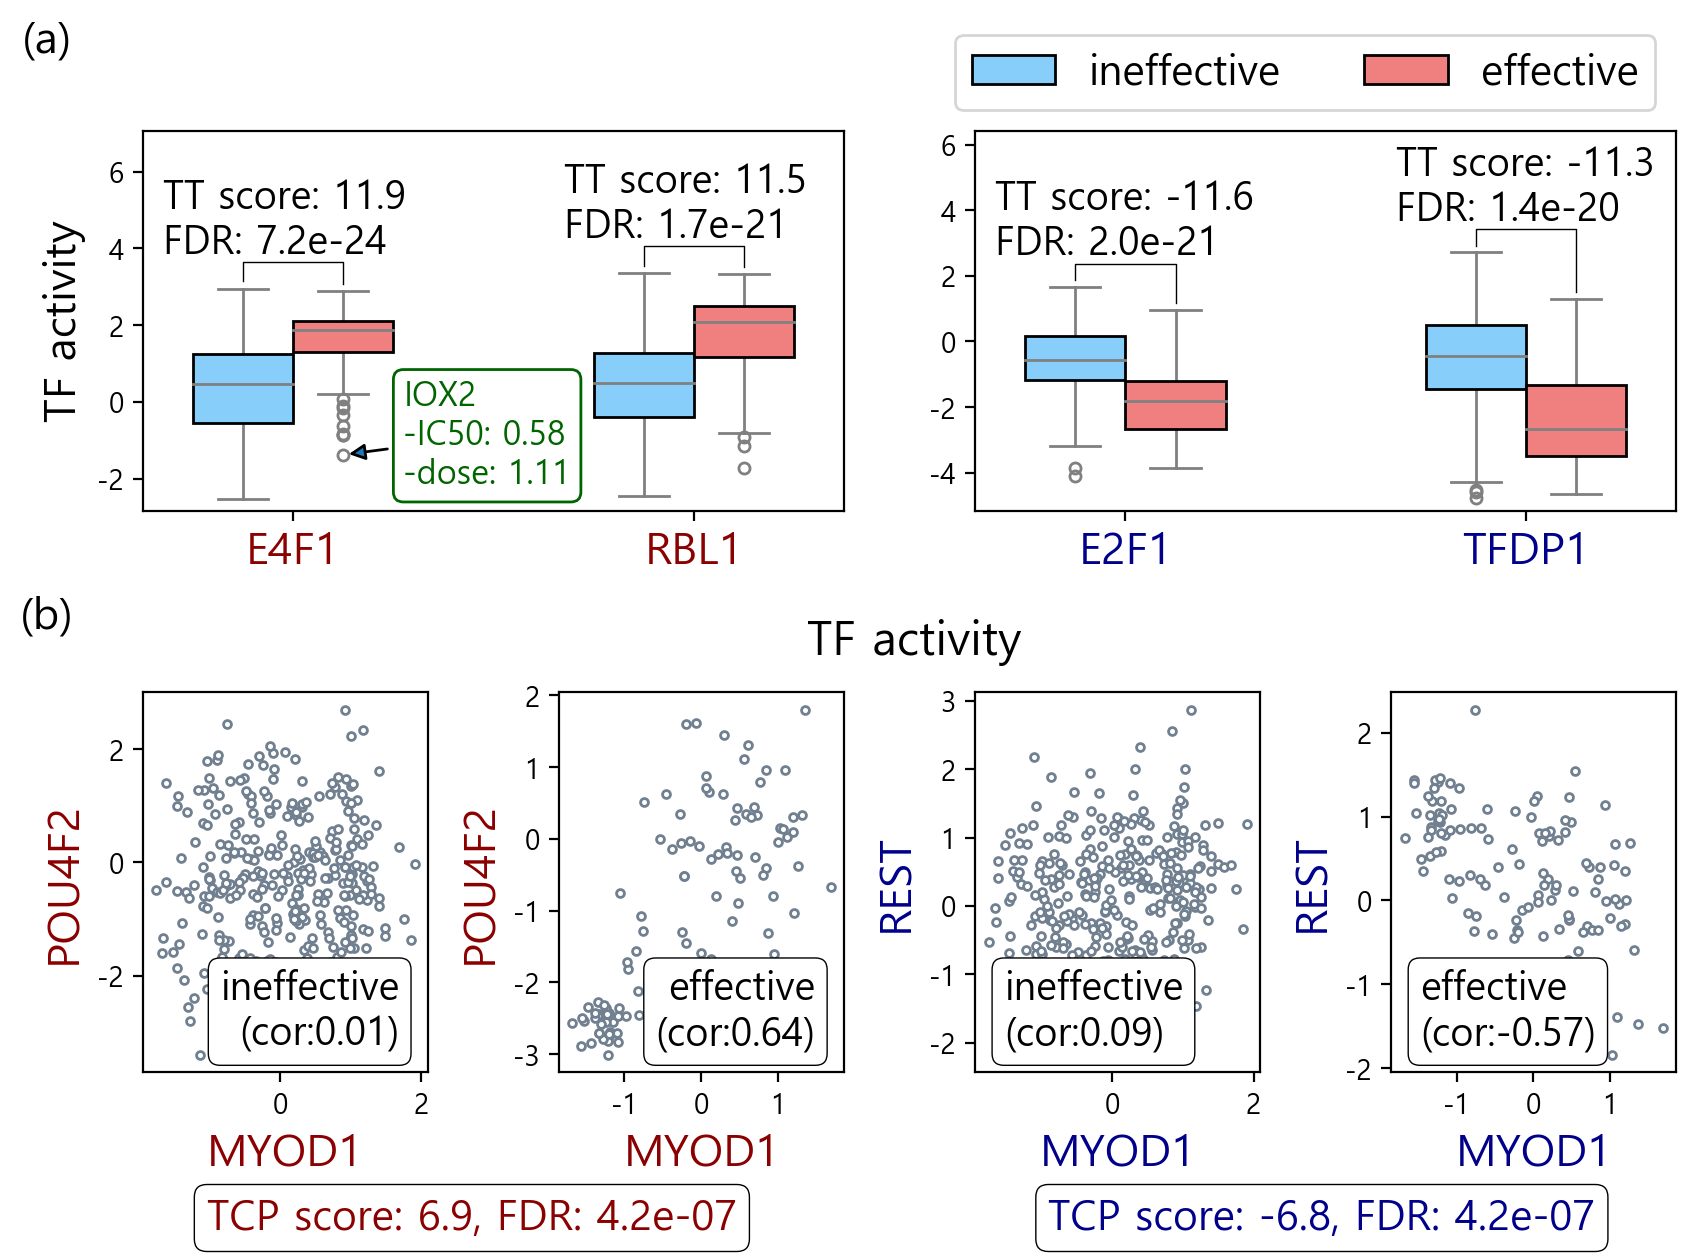

In [3]:
fig = plt.figure(figsize=(8.5,6), dpi=200)
ax1 = plt.subplot2grid((2,4), (0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,4), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,4), (1,0), fig=fig)
ax4 = plt.subplot2grid((2,4), (1,1), fig=fig)
ax5 = plt.subplot2grid((2,4), (1,2), fig=fig)
ax6 = plt.subplot2grid((2,4), (1,3), fig=fig)

### cell line
cell='A375'

####### box plots for top TTs
TTS=pd.read_table('result/TT_score_viper/TTS_{}.txt'.format(cell), index_col=0)

## TF activity box plots for the top 2 positive TTs
TTS_pos_top2=TTS.iloc[:2][['TTS','FDR']]
bp1,bp2=TFA_boxplot_of_TT(cell, TTS_pos_top2, 'darkred', ax1)

## TF activity box plots for the top 2 negative TTs
TTS_neg_top2=TTS.iloc[-2:][['TTS','FDR']]
TTS_neg_top2.sort_values(by='TTS', inplace=True)
bp1,bp2=TFA_boxplot_of_TT(cell, TTS_neg_top2, 'darkblue', ax2)

# add compound information inducing the lowest TF activity of the E4F1 in A375 cell
drug_info='IOX2\n-IC50: 0.58\n-dose: 1.11'
TFA=-1.38
ax1.annotate(drug_info, xy=(1.5, TFA), xytext=(1.8, ax1.get_ylim()[0]+0.5), ha='left', va='bottom', arrowprops={'arrowstyle': '-|>'}, fontsize=12,
            color='darkgreen',bbox=dict(facecolor='none', edgecolor='darkgreen', boxstyle='round'))

# legend & y label
ax1.set_ylabel('TF activity', fontsize=16)
ax2.legend(handles=(bp1["boxes"][0],bp2["boxes"][0]), labels=['ineffective', 'effective'], loc='lower right', bbox_to_anchor=(1,1), fontsize=15, ncol=2)


####### scatter plots for top TCPs
TCP=pd.read_table('result/TCP_score_viper/TCPS_merged.txt', sep='\t',index_col=[0,1])
TCP.sort_values(by=['Zobs(TCPS)_{}'.format(cell)], ascending=False, inplace=True)

## TF activity scatter plots for the top positive TCP
TCP_pos_top1=TCP.iloc[0][['corrE_{}'.format(cell), 'corrIE_{}'.format(cell), 'Zobs(TCPS)_{}'.format(cell), 'FDR_{}'.format(cell)]]
TCP_pos_top1.index=[ind.replace('_{}'.format(cell),'') for ind in TCP_pos_top1.index]

TFA_scatter_plot_of_TCP(TCP_pos_top1.name, 0 ,TCP_pos_top1['corrIE'], 'darkred', ax3)
TFA_scatter_plot_of_TCP(TCP_pos_top1.name, 1, TCP_pos_top1['corrE'] , 'darkred', ax4)

## TF activity scatter plots for the top negative TCP
TCP_neg_top1=TCP.iloc[-1][['corrE_{}'.format(cell), 'corrIE_{}'.format(cell), 'Zobs(TCPS)_{}'.format(cell), 'FDR_{}'.format(cell)]]
TCP_neg_top1.index=[ind.replace('_{}'.format(cell),'') for ind in TCP_neg_top1.index]

TFA_scatter_plot_of_TCP(TCP_neg_top1.name, 0 ,TCP_neg_top1['corrIE'], 'darkblue', ax5)
TFA_scatter_plot_of_TCP(TCP_neg_top1.name, 1, TCP_neg_top1['corrE'] , 'darkblue', ax6)

# text for TCP score and FDR
fig.text(0.27,-0.02, 'TCP score: {:.1f}, FDR: {:.1e}'.format(TCP_pos_top1['Zobs(TCPS)'],TCP_pos_top1['FDR']), ha='center', fontsize=15, color='darkred',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
fig.text(0.77,-0.02, 'TCP score: {:.1f}, FDR: {:.1e}'.format(TCP_neg_top1['Zobs(TCPS)'],TCP_neg_top1['FDR']), ha='center', fontsize=15, color='darkblue',
         bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# text for 'TF activity'
fig.text(0.53,0.45, 'TF activity', ha='center', va='bottom',fontsize=17)

# attach (a), (b) label
fig.text(0.02,0.97,'(a)', ha='center', va='center', fontsize=16)
fig.text(0.02,0.49,'(b)', ha='center', va='center', fontsize=16)

# tight layout
fig.tight_layout(h_pad=4)
fig.show()

### networks of the top 30 TCPs in the both cells

In [5]:
# mean TT score of two cell lines
TT=pd.read_table('result/TT_score_viper/TTS_merged.txt', sep='\t',index_col=0,engine='python')
TT=TT[['TTS_A375', 'TTS_HT29']]

TTS_dic=TT.apply(lambda x: np.mean(x), axis=1).to_dict()

# get top TCPs in average
top_num=30
TCP=pd.read_table('result/TCP_score_viper/TCPS_merged_for_only_significant.txt', index_col=[0,1], sep='\t')
top_TCP=TCP.head(top_num)[['Zobs(TCPS)_A375', 'Zobs(TCPS)_HT29']]
top_TCP['TCPS_ave']=top_TCP.apply(lambda x: np.mean(x), axis=1)
top_TCP.head()

,,Zobs(TCPS)_A375,Zobs(TCPS)_HT29,TCPS_ave
TF1,TF2,,,
DENND4A,SFPQ,5.48413,5.54885,5.516490
FOXO3,POU2F2,-4.56924,-6.07061,-5.319925
POLR1A,POU2F2,-5.78699,-4.30947,-5.048230
E2F8,POU2F2,-5.78699,-4.30947,-5.048230
E2F7,POU2F2,-5.78699,-4.30947,-5.048230


{'DENND4A': Text(2.0, 2.0, 'DENND4A'),
 'SFPQ': Text(1.0, 1.0, 'SFPQ'),
 'FOXO3': Text(2.0, 0.0, 'FOXO3'),
 'POU2F2': Text(0.0, 0.0, 'POU2F2'),
 'POLR1A': Text(0.17149999808288974, -2.2193775510463034, 'POLR1A'),
 'E2F8': Text(1.1321060651048438, -2.5727762241364553, 'E2F8'),
 'E2F7': Text(2.1125508260007284, -2.105967076657204, 'E2F7'),
 'TCF7L2': Text(-1.0, -2.0, 'TCF7L2'),
 'IFI16': Text(1.0, 3.0, 'IFI16'),
 'TLX1': Text(2.0, 4.0, 'TLX1'),
 'AATF': Text(-1.5, 5.0, 'AATF'),
 'RUNX3': Text(0.0, 4.0, 'RUNX3'),
 'MYBL2': Text(0.8085653908374802, 6.66674277319129, 'MYBL2'),
 'ENO1': Text(1.6527439415499734, 6.661272612805827, 'ENO1'),
 'MXI1': Text(-0.08018685632422053, 6.672267930887525, 'MXI1'),
 'CEBPE': Text(0.5443230983287863, 8.799324272444613, 'CEBPE'),
 'SMARCA4': Text(-0.3472983176647896, 5.484446169291434, 'SMARCA4'),
 'FOXL2': Text(4.0, 3.5, 'FOXL2'),
 'SOX17': Text(4.0, 4.5, 'SOX17'),
 'APEX1': Text(5.0, 2.0, 'APEX1'),
 'HIC1': Text(4.0, 1.0, 'HIC1'),
 'MYCN': Text(-1.0, 1.0,

Text(0, 0.5, 'TT score (node)')

Text(0, 0.5, 'TCP score (edge)')

C:\Users\jmjun\anaconda3\envs\theraTF\lib\site-packages\ipykernel_launcher.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


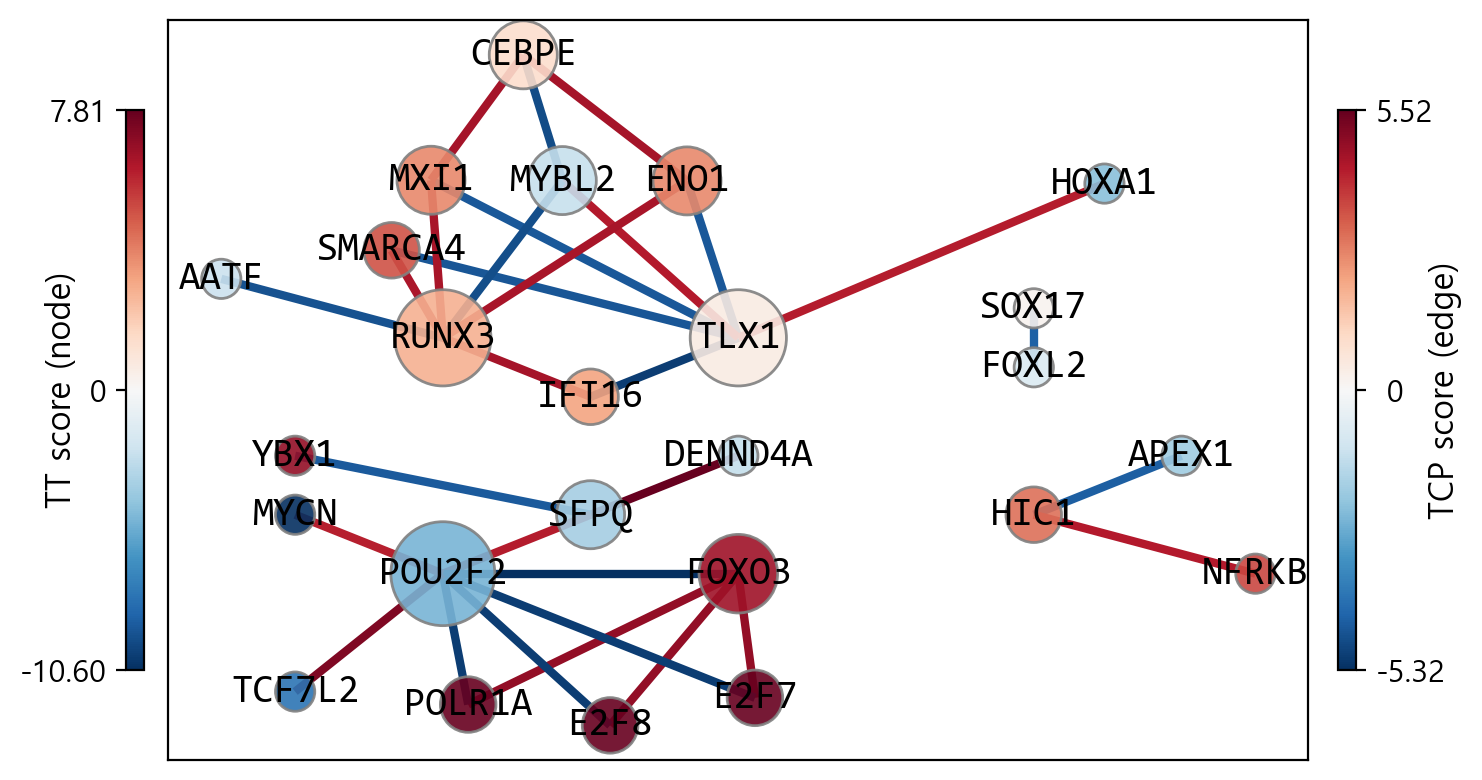

In [6]:
fig=plt.figure(figsize=(6,4), dpi=200)
ax1=fig.add_subplot(1,1,1)

# get sig TCP list & TCP network
TCP_nx=nx.Graph()
for ind in top_TCP.index:
    TCPS =top_TCP.loc[ind,'TCPS_ave']
    TF1,TF2=ind
    TCP_nx.add_edge(TF1, TF2, TCPS=TCPS)
    
# attach TTS to nodes of TCP network
for nd1 in TCP_nx.nodes():
    TCP_nx.nodes[nd1]['TTS']=TTS_dic[nd1]

## draw TCP network
edges, edge_weights = zip(*nx.get_edge_attributes(TCP_nx,'TCPS').items())
nodes, node_weights = zip(*nx.get_node_attributes(TCP_nx,'TTS').items())
node_dic = {nd:nd for nd in TCP_nx.nodes()}

pos_dic={'POU2F2':(0,0), 'FOXO3':(2,0), 'SFPQ':(1,1),'YBX1':(-1,2),'DENND4A':(2,2),'MYCN':(-1,1), 'TCF7L2':(-1,-2),
         'RUNX3':(0,4), 'TLX1':(2,4), 'IFI16':(1,3), 'AATF':(-1.5,5),
         'HIC1': (4,1), 'APEX1': (5,2), 'NFRKB': (5.5,0),
         'SOX17': (4,4.5), 'FOXL2': (4,3.5)}
graph_pos = nx.fruchterman_reingold_layout(TCP_nx, pos=pos_dic, fixed=pos_dic.keys(), k=1.5, scale=1)

# draw nodes
node_cm=nx.draw_networkx_nodes(G=TCP_nx, pos=graph_pos, nodelist=nodes,
                               node_size=[v * 200 for v in dict(TCP_nx.degree).values()],
                               node_color=node_weights, cmap=plt.cm.RdBu_r, alpha=0.9, edgecolors='gray',ax=ax1)

# attach node labels
nx.draw_networkx_labels(G=TCP_nx, pos=graph_pos, labels=node_dic,font_size=14,
                        font_color='black', font_family='Consolas', ax=ax1) 

# draw edges
edge_cm=nx.draw_networkx_edges(G=TCP_nx, pos=graph_pos, edge_color=edge_weights, edge_cmap=plt.cm.RdBu_r, width=3, ax=ax1)

# node color bar
cax1 = fig.add_axes([-0.01, 0.15, 0.015, 0.7])
cbar=fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.RdBu_r), cax=cax1)

min1=np.min(node_weights)
max1=np.max(node_weights)
cbar.set_ticks([0,0.5,1])
cbar.set_ticklabels(['{:.2f}'.format(min1),' 0','{:.2f}'.format(max1)])
cbar.ax.tick_params(labelsize=11)
cbar.ax.tick_params(left=True,labelleft=True)
cbar.ax.tick_params(right=False,labelright=False)
cbar.ax.set_ylabel('TT score (node)', fontsize=12)
cbar.ax.yaxis.set_label_coords(-4.5,0.5)

# edge color bar
cax2 = fig.add_axes([1, 0.15, 0.015, 0.7])
cbar=fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.RdBu_r), cax=cax2)

min1=np.min(edge_weights)
max1=np.max(edge_weights)
cbar.set_ticks([0,0.5,1])
cbar.set_ticklabels(['{:.2f}'.format(min1),' 0','{:.2f}'.format(max1)])
cbar.ax.tick_params(labelsize=11)
cbar.ax.set_ylabel('TCP score (edge)', fontsize=12)
cbar.ax.yaxis.set_label_coords(5,0.5)

# figure show
fig.tight_layout()
fig.savefig('network.jpg')

### bar and box plots for the results of hypergeometric tests applied to the characterized sig TTs and TCPs

database                  TTD
sig_or_ran                sig
sig_TCP_type              neg
p-value           7.37959e-06
neg_log_pvalue        5.13197
Name: 35, dtype: object


C:\Users\jmjun\anaconda3\envs\theraTF\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log10


Text(0.35, 3.6319675906982285, 'P: 7.4e-06\nEP: 7.2e-03')

database               TSgene
sig_or_ran                sig
sig_TCP_type              pos
p-value           9.42371e-08
neg_log_pvalue        7.02578
Name: 37, dtype: object


Text(1.85, 5.525778048204266, 'P: 9.4e-08\nEP: 7.6e-03')

database          uniprot(oncogene)
sig_or_ran                      sig
sig_TCP_type                    neg
p-value                 3.67306e-16
neg_log_pvalue               15.435
Name: 5, dtype: object


Text(3.35, 13.934972429068074, 'P: 3.7e-16\nEP: 1.2e-03')

database          uniprot(tumor_suppressor)
sig_or_ran                              sig
sig_TCP_type                            pos
p-value                         1.18087e-12
neg_log_pvalue                      11.9278
Name: 10, dtype: object


Text(4.85, 10.427796832127806, 'P: 1.2e-12\nEP: 2.2e-03')

Text(0.05, 0.97, '(a)')

Text(0.05, 0.47, '(b)')

C:\Users\jmjun\anaconda3\envs\theraTF\lib\site-packages\ipykernel_launcher.py:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


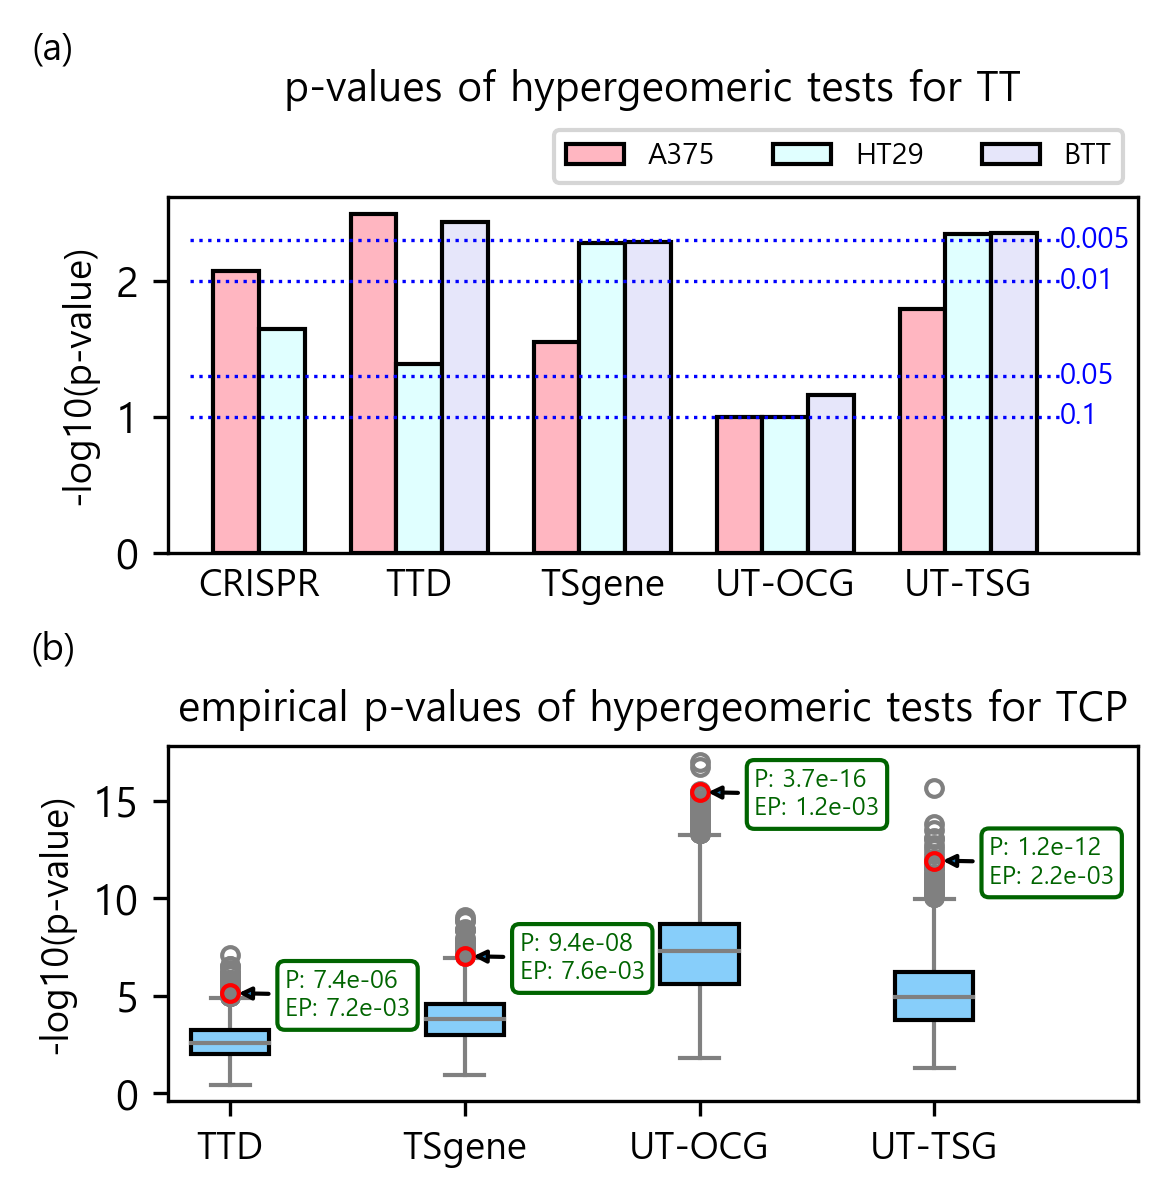

In [2]:
fig=plt.figure(figsize=(4,4), dpi=300)
ax1, ax2 = fig.subplots(2,1)

## p values of hypergeometric tests of sig TTs
hyp_res=pd.read_table('result/TT_score_viper/hyperGeo_result.txt', sep='\t')
cell2col={'A375':'lightpink','HT29':'lightcyan','both':'lavender'}

x_pos=-1
for db in ['CRISPR(0.3)', 'TTD', 'TSgene', 'uniprot(OCG)', 'uniprot(TSG)']:
    x_pos+=1
    for cell in ['A375','HT29','both']:
        if (db=='CRISPR(0.3)') and (cell=='both'):
            continue
        p_val=hyp_res.loc[(hyp_res['database']==db)&(hyp_res['cell']==cell),'p-value']
        neg_pval=-np.log10(p_val)
        _=ax1.bar([x_pos],neg_pval.values, color=cell2col[cell], width=1, edgecolor='k')
        x_pos+=1


_=ax1.plot([-1,18],[-np.log10(0.1),-np.log10(0.1)], color='blue', lw=0.8, ls=':')
_=ax1.plot([-1,18],[-np.log10(0.05),-np.log10(0.05)], color='blue', lw=0.8, ls=':')
_=ax1.plot([-1,18],[-np.log10(0.01),-np.log10(0.01)], color='blue', lw=0.8, ls=':')
_=ax1.plot([-1,18],[-np.log10(0.005),-np.log10(0.005)], color='blue', lw=0.8, ls=':')

_=ax1.text(18,-np.log10(0.1), '0.1',  ha='left', va='center',fontsize=7, color='b')
_=ax1.text(18,-np.log10(0.05), '0.05',  ha='left', va='center',fontsize=7, color='b')
_=ax1.text(18,-np.log10(0.01), '0.01',  ha='left', va='center',fontsize=7, color='b')
_=ax1.text(18,-np.log10(0.005),'0.005', ha='left', va='center',fontsize=7, color='b')
        
_=ax1.set_xticks([0.5,4,8,12,16])
_=ax1.set_xticklabels(['CRISPR', 'TTD', 'TSgene', 'UT-OCG',  'UT-TSG'], fontsize=9)
_=ax1.set_ylabel('-log10(p-value)', fontsize=9)
_=ax1.set_title('p-values of hypergeomeric tests for TT', fontsize=10,x=0.5,y=1.2)
_=ax1.tick_params('x',which='both', length=0.0)
_=ax1.set_xlim(-1.5,19.7)

# legend
patch_list=[]
for cell in ['A375','HT29','both']:
    patch_list.append(mpatches.Patch(facecolor=cell2col[cell], edgecolor='k', label=cell.replace('both','BTT')))

_=ax1.legend(handles=patch_list, loc='lower right', fontsize=7, bbox_to_anchor=(1.0,1.0), ncol=3)

## p values of hypergeometric tests of sig TCPs
hyp_res=pd.read_table('result/TCP_score_viper/hyperGeo_result.txt', index_col=['database'], usecols=['sig_or_ran','sig_TCP_type','database','p-value'])
hyp_res=hyp_res.sort_values(by='p-value')
hyp_res['neg_log_pvalue']=hyp_res['p-value'].map(lambda x: -np.log10(x))

flierprops = dict(marker='o', markersize=4,markerfacecolor='none',markeredgecolor='grey')

x=0
for db in ['TTD', 'TSgene', 'uniprot(oncogene)', 'uniprot(tumor_suppressor)']:
    hyp_res_db=hyp_res.loc[db].reset_index()
    bp1=ax2.boxplot(hyp_res_db['neg_log_pvalue'], positions=[x], widths=0.5 ,patch_artist=True,
                    boxprops={'facecolor':'lightskyblue'}, flierprops=flierprops, whiskerprops=dict(color='grey'), medianprops=dict(color='grey'), capprops=dict(color='grey'))
     
    sig_sr=hyp_res_db.loc[hyp_res_db['sig_or_ran']=='sig'].iloc[0]
    y=sig_sr['neg_log_pvalue']
    print(sig_sr)
    ax2.plot(x, y, marker='o', markersize=4, color='red', mfc='none')
    
    emp_rank=sig_sr.name+1
    emp_pval=emp_rank/5000
    #######ax2.text(emp_pval, pval)
    pval_info='P: {:.1e}\nEP: {:.1e}'.format(sig_sr['p-value'], emp_pval)
    ax2.annotate(pval_info, xy=(x, y), xytext=(x+0.35, y-1.5), ha='left', va='bottom', arrowprops={'arrowstyle': '-|>'}, fontsize=6,
                 color='darkgreen',bbox=dict(facecolor='none', edgecolor='darkgreen', boxstyle='round'))

    x+=1.5

_=ax2.set_xticklabels(['TTD','TSgene','UT-OCG','UT-TSG'], fontsize=9)
_=ax2.set_ylabel('-log10(p-value)', fontsize=9)
_=ax2.set_title('empirical p-values of hypergeomeric tests for TCP', fontsize=10)
_=ax2.set_xlim(-0.4,5.8)

# attach (a), (b) label
fig.text(0.05,0.97,'(a)', ha='center', va='center', fontsize=9)
fig.text(0.05,0.47,'(b)', ha='center', va='center', fontsize=9)

fig.tight_layout(h_pad=2)
fig.show()